# COVID vaccination analysis and impact - Technical Excercise

In [1]:
### importing required resources
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
import os

In [2]:
# APPENDING ALL THE 12 MONTHS CSV FILE INTO 1 DATAFRAME
directory = 'C:/Users/jaska/Desktop/data/12mos' # specifying directory/folder location
df_out = pd.DataFrame() # creating empty dataframe to append data extracted from every file
for filename in os.listdir(directory): # looping through each file in specified folder
        df = pd.read_csv(directory + '/' + filename, sep = ',', skiprows = 1, header = None) # reading the file in current iteration, skipping top row
        df_out = df_out.append(df) # appending the df extracted from the file in the current iteration as a row in this dataframe

In [3]:
# SETTING COLUMN NAMES
df_out.columns = ['ID', 'Date', 'Location', 'Brand', 'Satisfaction']

### Initial exploration and data cleaning¶

In [4]:
# checking for size of the dataframe
df_out.shape

(7428, 5)

In [5]:
# it has 7428 rows and 5 columns - but some patients must be getting the vaccines more than once
#  CHECKING FOR NULL VALUES
df_out.isnull().sum()

ID              0
Date            0
Location        0
Brand           0
Satisfaction    0
dtype: int64

In [6]:
# there are no null values
# checking for Dtypes
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7428 entries, 0 to 666
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            7428 non-null   object 
 1   Date          7428 non-null   object 
 2   Location      7428 non-null   object 
 3   Brand         7428 non-null   object 
 4   Satisfaction  7428 non-null   float64
dtypes: float64(1), object(4)
memory usage: 348.2+ KB


In [7]:
# date column data showuld be in datetime format
# looking at excel files we see date is in MM/DD/YYYY format
# parsing valid date strings to datetime
df_out['new_date'] =pd.to_datetime(df_out['Date']) # setting date in new column so original information is not lost and can be checked for errors later

In [8]:
# No null values were observed
# let us find uniquevalues of location and brand
df_out['Location'].unique()

array([' rexall  ', 'rexall', " Shopper's drug mart", ' Walmart',
       'Rexall', "Shopper's Drug Mart", 'Walmart', 'Walmart ', 'loblaws',
       'London Drugs', 'Loblaws', 'london drugs', 'loblaws   '],
      dtype=object)

In [9]:
# mainly there are 5 locations in the given datasets where the vaccination was administered
# let us specify location names in a cleaner/standardised way
df_out.loc[df_out['Location'].str.contains("rexall", case=False), 'Location_new'] = "Rexall"
df_out.loc[df_out['Location'].str.contains("shopper", case=False), 'Location_new'] = "Shopper's Drug Mart"
df_out.loc[df_out['Location'].str.contains("walmart", case=False), 'Location_new'] = "Walmart"
df_out.loc[df_out['Location'].str.contains("loblaws", case=False), 'Location_new'] = "Loblaws"
df_out.loc[df_out['Location'].str.contains("london", case=False), 'Location_new'] = "London Drugs"

In [10]:
# checking unique values in this new location column
df_out['Location_new'].unique()

array(['Rexall', "Shopper's Drug Mart", 'Walmart', 'Loblaws',
       'London Drugs'], dtype=object)

In [11]:
# checking brand column uniqueness
df_out['Brand'].unique()

array(['Brand X', 'Brand Y'], dtype=object)

In [12]:
# Brand column looks OK
# let us look at number of unique patients
temp = df_out['ID'].value_counts()
print('Number of unique patients: ', len(temp))

Number of unique patients:  3950


In [13]:
# looking at temp dataframe
temp

ijefdc2    4
jtdepnm    4
6trlnio    4
t2suilo    4
kati51b    4
          ..
8k2yvd6    1
ap0uekr    1
olcvsm1    1
mg48pdc    1
9voykrg    1
Name: ID, Length: 3950, dtype: int64

In [14]:
# since it is mentioned that the vaccination is a 3 dose vaccination, some patient ID's are occuring 4 times in the dataframe
# this needs to be looked into
# checking at random for one of the patient IDs
df_out.loc[df_out['ID'] == 'ijefdc2']

,ID,Date,Location,Brand,Satisfaction,new_date,Location_new
240,ijefdc2,2021-12-26,Walmart,Brand Y,52.18,2021-12-26,Walmart
1513,ijefdc2,2021-12-26,Walmart,Brand Y,52.18,2021-12-26,Walmart
69,ijefdc2,2021-06-25,Walmart,Brand Y,76.14,2021-06-25,Walmart
137,ijefdc2,2021-11-09,london drugs,Brand Y,49.41,2021-11-09,London Drugs


In [15]:
# we see thatthe patient has been accounted for two times on a signle day of vaccination - which cannot be true
# therefore such duplicates must be removed
# rows with same ID and same vaccination date are definitely erroneous
df_out.drop_duplicates(['ID','new_date'],keep= 'last', inplace=True)

In [16]:
# selecting only required values
df = df_out[['ID', 'Brand', 'Satisfaction', 'new_date', 'Location_new']]

In [45]:
# grouping by ID and unstacking to get dates, brands and locations for each patient in a single row
df['abc'] = df.groupby('ID').cumcount()+1
df=df.set_index(['abc','ID']).unstack(0)

<ipython-input-45-81ee71e63d56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['abc'] = df.groupby('ID').cumcount()+1


In [47]:
# fixing names for the unstacked columns
df.columns=[f"{x}{y}" for x,y in df.columns]
# resetting index
df = df.reset_index()
df.head()

,ID,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,Satisfaction3,new_date1,new_date2,new_date3,Location_new1,Location_new2,Location_new3
0,01li4zk,Brand X,Brand X,NaN,37.72,47.48,NaN,2021-12-27,2021-07-19,NaT,Rexall,Walmart,NaN
1,028r7ml,Brand X,Brand X,NaN,51.63,35.24,NaN,2021-12-16,2021-10-21,NaT,Walmart,Walmart,NaN
2,032zobq,Brand X,Brand X,NaN,71.60,62.84,NaN,2021-01-01,2021-05-17,NaT,Rexall,London Drugs,NaN
3,03k1ilx,Brand X,Brand X,Brand X,48.66,50.75,42.07,2021-08-06,2021-07-09,2021-10-26,London Drugs,Shopper's Drug Mart,Walmart
4,04ao8vg,Brand Y,Brand Y,Brand Y,61.76,75.26,55.78,2021-12-25,2021-06-17,2021-11-26,Rexall,Rexall,Loblaws


In [48]:
# there should be 3950 patients - lets check
df.shape

(3950, 13)

In [49]:
# defining date of 1st vaccination - minimum of 3 dates
df['vacc1_date'] = df[['new_date1', 'new_date2', 'new_date3']].min(axis=1)
# defining location of first vaccination
df['vacc1_loc'] = np.where(df['vacc1_date']==df['new_date1'], df['Location_new1'],
                          np.where(df['vacc1_date']==df['new_date2'], df['Location_new2'],
                                  np.where(df['vacc1_date']==df['new_date3'], df['Location_new3'], None)))
# defining date of 3rd vaccination where applicable - max of three dates
df['vacc3_date_temp'] = df[['new_date1', 'new_date2', 'new_date3']].max(axis=1)
# converting datetime to string for ease of operations - sometimes interactions between numpy and pandas datetime formats could be wonky
df['vacc3_date_temp'] = df['vacc3_date_temp'].dt.strftime('%Y-%m-%d')
# defining date of 3rd vaccination
df['vacc3_date'] = np.where((df['new_date2'].notnull() & df['new_date3'].notnull()),
                            df['vacc3_date_temp'], None)
# converting date back to datetime format from string format
df['vacc3_date'] = df['vacc3_date'].astype(np.datetime64)
# defining location of third vaccination
df['vacc3_loc'] = np.where(df['vacc3_date']==df['new_date1'], df['Location_new1'],
                          np.where(df['vacc3_date']==df['new_date2'], df['Location_new2'],
                                  np.where(df['vacc3_date']==df['new_date3'], df['Location_new3'], None)))

In [52]:
# dropping unwanted column - intermediate column used for calculations
df.drop(columns=['vacc3_date_temp'], inplace=True)
# checking
df.head()

,ID,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,Satisfaction3,new_date1,new_date2,new_date3,Location_new1,Location_new2,Location_new3,vacc1_date,vacc1_loc,vacc3_date,vacc3_loc
0,01li4zk,Brand X,Brand X,NaN,37.72,47.48,NaN,2021-12-27,2021-07-19,NaT,Rexall,Walmart,NaN,2021-07-19,Walmart,NaT,None
1,028r7ml,Brand X,Brand X,NaN,51.63,35.24,NaN,2021-12-16,2021-10-21,NaT,Walmart,Walmart,NaN,2021-10-21,Walmart,NaT,None
2,032zobq,Brand X,Brand X,NaN,71.60,62.84,NaN,2021-01-01,2021-05-17,NaT,Rexall,London Drugs,NaN,2021-01-01,Rexall,NaT,None
3,03k1ilx,Brand X,Brand X,Brand X,48.66,50.75,42.07,2021-08-06,2021-07-09,2021-10-26,London Drugs,Shopper's Drug Mart,Walmart,2021-07-09,Shopper's Drug Mart,2021-10-26,Walmart
4,04ao8vg,Brand Y,Brand Y,Brand Y,61.76,75.26,55.78,2021-12-25,2021-06-17,2021-11-26,Rexall,Rexall,Loblaws,2021-06-17,Rexall,2021-12-25,Rexall


In [53]:
# calculating date for 2nd vaccination where applicable
df['vacc2_date_temp'] = df[['new_date1', 'new_date2', 'new_date3']].max(axis=1)
# conversion of datetime to string for calculations involving numpy and pandas datetime formats' interactions
df['vacc2_date_temp'] = df['vacc2_date_temp'].dt.strftime('%Y-%m-%d')
# conditional statements
df['vacc2_date'] = np.where(((df['new_date2'].notnull() & df['new_date3'].isnull()) | 
                                 (df['new_date2'].isnull() & df['new_date3'].notnull())), df['vacc2_date_temp'], None)


In [56]:
# dropping unwanted column - intermediate column used for calculations
df.drop(columns=['vacc2_date_temp'], inplace=True)
# checking
df.head(10)

,ID,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,Satisfaction3,new_date1,new_date2,new_date3,Location_new1,Location_new2,Location_new3,vacc1_date,vacc1_loc,vacc3_date,vacc3_loc,vacc2_date
0,01li4zk,Brand X,Brand X,NaN,37.72,47.48,NaN,2021-12-27,2021-07-19,NaT,Rexall,Walmart,NaN,2021-07-19,Walmart,NaT,None,2021-12-27
1,028r7ml,Brand X,Brand X,NaN,51.63,35.24,NaN,2021-12-16,2021-10-21,NaT,Walmart,Walmart,NaN,2021-10-21,Walmart,NaT,None,2021-12-16
2,032zobq,Brand X,Brand X,NaN,71.60,62.84,NaN,2021-01-01,2021-05-17,NaT,Rexall,London Drugs,NaN,2021-01-01,Rexall,NaT,None,2021-05-17
3,03k1ilx,Brand X,Brand X,Brand X,48.66,50.75,42.07,2021-08-06,2021-07-09,2021-10-26,London Drugs,Shopper's Drug Mart,Walmart,2021-07-09,Shopper's Drug Mart,2021-10-26,Walmart,None
4,04ao8vg,Brand Y,Brand Y,Brand Y,61.76,75.26,55.78,2021-12-25,2021-06-17,2021-11-26,Rexall,Rexall,Loblaws,2021-06-17,Rexall,2021-12-25,Rexall,None
5,04dq8g9,Brand X,NaN,NaN,38.73,NaN,NaN,2021-12-18,NaT,NaT,Walmart,NaN,NaN,2021-12-18,Walmart,NaT,None,None
6,04hrogc,Brand Y,NaN,NaN,50.82,NaN,NaN,2021-10-01,NaT,NaT,Walmart,NaN,NaN,2021-10-01,Walmart,NaT,None,None
7,053wm9g,Brand X,Brand X,NaN,57.70,54.84,NaN,2021-11-27,2021-10-25,NaT,Walmart,Shopper's Drug Mart,NaN,2021-10-25,Shopper's Drug Mart,NaT,None,2021-11-27
8,068vpw7,Brand X,Brand X,NaN,41.75,19.59,NaN,2021-01-17,2021-05-17,NaT,Rexall,Walmart,NaN,2021-01-17,Rexall,NaT,None,2021-05-17
9,069v1jw,Brand Y,NaN,NaN,55.30,NaN,NaN,2021-12-31,NaT,NaT,Walmart,NaN,NaN,2021-12-31,Walmart,NaT,None,None


In [57]:
# no date is obtained for patients that received 3 vaccinations - fixing the issue - flagging it with text
df['vacc2_date'] = np.where((df['new_date2'].notnull() & df['new_date3'].notnull()),
                            "3 doses received", df['vacc2_date'])
# checking
df.head(10)


,ID,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,Satisfaction3,new_date1,new_date2,new_date3,Location_new1,Location_new2,Location_new3,vacc1_date,vacc1_loc,vacc3_date,vacc3_loc,vacc2_date
0,01li4zk,Brand X,Brand X,NaN,37.72,47.48,NaN,2021-12-27,2021-07-19,NaT,Rexall,Walmart,NaN,2021-07-19,Walmart,NaT,None,2021-12-27
1,028r7ml,Brand X,Brand X,NaN,51.63,35.24,NaN,2021-12-16,2021-10-21,NaT,Walmart,Walmart,NaN,2021-10-21,Walmart,NaT,None,2021-12-16
2,032zobq,Brand X,Brand X,NaN,71.60,62.84,NaN,2021-01-01,2021-05-17,NaT,Rexall,London Drugs,NaN,2021-01-01,Rexall,NaT,None,2021-05-17
3,03k1ilx,Brand X,Brand X,Brand X,48.66,50.75,42.07,2021-08-06,2021-07-09,2021-10-26,London Drugs,Shopper's Drug Mart,Walmart,2021-07-09,Shopper's Drug Mart,2021-10-26,Walmart,3 doses received
4,04ao8vg,Brand Y,Brand Y,Brand Y,61.76,75.26,55.78,2021-12-25,2021-06-17,2021-11-26,Rexall,Rexall,Loblaws,2021-06-17,Rexall,2021-12-25,Rexall,3 doses received
5,04dq8g9,Brand X,NaN,NaN,38.73,NaN,NaN,2021-12-18,NaT,NaT,Walmart,NaN,NaN,2021-12-18,Walmart,NaT,None,None
6,04hrogc,Brand Y,NaN,NaN,50.82,NaN,NaN,2021-10-01,NaT,NaT,Walmart,NaN,NaN,2021-10-01,Walmart,NaT,None,None
7,053wm9g,Brand X,Brand X,NaN,57.70,54.84,NaN,2021-11-27,2021-10-25,NaT,Walmart,Shopper's Drug Mart,NaN,2021-10-25,Shopper's Drug Mart,NaT,None,2021-11-27
8,068vpw7,Brand X,Brand X,NaN,41.75,19.59,NaN,2021-01-17,2021-05-17,NaT,Rexall,Walmart,NaN,2021-01-17,Rexall,NaT,None,2021-05-17
9,069v1jw,Brand Y,NaN,NaN,55.30,NaN,NaN,2021-12-31,NaT,NaT,Walmart,NaN,NaN,2021-12-31,Walmart,NaT,None,None


In [60]:
# number of people for whom date of 2nd vaccination is to be found
df[df['vacc2_date']=='3 doses received'].shape

(672, 18)

In [61]:
# exporting to excel for checking and manipulating data - 672 rows can be handled by Excel
df.to_excel(r'C:/Users/jaska/Desktop/data/df_to_excel.xlsx', index = False)

In [71]:
# reading the modified file back to dataframe with date of 2nd vaccination calculated
file = 'C:/Users/jaska/Desktop/data/df_to_excel.xlsx'
df = pd.read_excel(file)
df.head()

,ID,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,Satisfaction3,new_date1,new_date2,new_date3,Location_new1,Location_new2,Location_new3,vacc1_date,vacc1_loc,vacc3_date,vacc3_loc,vacc2_date,Middle_date
0,01li4zk,Brand X,Brand X,NaN,37.72,47.48,NaN,2021-12-27,2021-07-19,NaT,Rexall,Walmart,NaN,2021-07-19,Walmart,NaT,NaN,2021-12-27,NaT
1,028r7ml,Brand X,Brand X,NaN,51.63,35.24,NaN,2021-12-16,2021-10-21,NaT,Walmart,Walmart,NaN,2021-10-21,Walmart,NaT,NaN,2021-12-16,NaT
2,032zobq,Brand X,Brand X,NaN,71.60,62.84,NaN,2021-01-01,2021-05-17,NaT,Rexall,London Drugs,NaN,2021-01-01,Rexall,NaT,NaN,2021-05-17,NaT
3,03k1ilx,Brand X,Brand X,Brand X,48.66,50.75,42.07,2021-08-06,2021-07-09,2021-10-26,London Drugs,Shopper's Drug Mart,Walmart,2021-07-09,Shopper's Drug Mart,2021-10-26,Walmart,3 doses received,2021-08-06
4,04ao8vg,Brand Y,Brand Y,Brand Y,61.76,75.26,55.78,2021-12-25,2021-06-17,2021-11-26,Rexall,Rexall,Loblaws,2021-06-17,Rexall,2021-12-25,Rexall,3 doses received,2021-11-26


In [72]:
# checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             3950 non-null   object        
 1   Brand1         3950 non-null   object        
 2   Brand2         2732 non-null   object        
 3   Brand3         672 non-null    object        
 4   Satisfaction1  3950 non-null   float64       
 5   Satisfaction2  2732 non-null   float64       
 6   Satisfaction3  672 non-null    float64       
 7   new_date1      3950 non-null   datetime64[ns]
 8   new_date2      2732 non-null   datetime64[ns]
 9   new_date3      672 non-null    datetime64[ns]
 10  Location_new1  3950 non-null   object        
 11  Location_new2  2732 non-null   object        
 12  Location_new3  672 non-null    object        
 13  vacc1_date     3950 non-null   datetime64[ns]
 14  vacc1_loc      3950 non-null   object        
 15  vacc3_date     672 no

In [79]:
# converting date to string for the reason described earlier
df['Middle_date'] = df['Middle_date'].dt.strftime('%Y-%m-%d')
# conditional statements
df['vacc2_date'] = np.where(df['vacc2_date']=="3 doses received",
                            df['Middle_date'], df['vacc2_date'])
# converting date back to datetime format from string format
df['vacc2_date'] = df['vacc2_date'].astype(np.datetime64)

In [77]:
# removing unwanted columns
df.drop(columns=['Middle_date'], inplace=True)
# checking
df.head(10)

,ID,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,Satisfaction3,new_date1,new_date2,new_date3,Location_new1,Location_new2,Location_new3,vacc1_date,vacc1_loc,vacc3_date,vacc3_loc,vacc2_date
0,01li4zk,Brand X,Brand X,NaN,37.72,47.48,NaN,2021-12-27,2021-07-19,NaT,Rexall,Walmart,NaN,2021-07-19,Walmart,NaT,NaN,2021-12-27
1,028r7ml,Brand X,Brand X,NaN,51.63,35.24,NaN,2021-12-16,2021-10-21,NaT,Walmart,Walmart,NaN,2021-10-21,Walmart,NaT,NaN,2021-12-16
2,032zobq,Brand X,Brand X,NaN,71.60,62.84,NaN,2021-01-01,2021-05-17,NaT,Rexall,London Drugs,NaN,2021-01-01,Rexall,NaT,NaN,2021-05-17
3,03k1ilx,Brand X,Brand X,Brand X,48.66,50.75,42.07,2021-08-06,2021-07-09,2021-10-26,London Drugs,Shopper's Drug Mart,Walmart,2021-07-09,Shopper's Drug Mart,2021-10-26,Walmart,2021-08-06
4,04ao8vg,Brand Y,Brand Y,Brand Y,61.76,75.26,55.78,2021-12-25,2021-06-17,2021-11-26,Rexall,Rexall,Loblaws,2021-06-17,Rexall,2021-12-25,Rexall,2021-11-26
5,04dq8g9,Brand X,NaN,NaN,38.73,NaN,NaN,2021-12-18,NaT,NaT,Walmart,NaN,NaN,2021-12-18,Walmart,NaT,NaN,NaN
6,04hrogc,Brand Y,NaN,NaN,50.82,NaN,NaN,2021-10-01,NaT,NaT,Walmart,NaN,NaN,2021-10-01,Walmart,NaT,NaN,NaN
7,053wm9g,Brand X,Brand X,NaN,57.70,54.84,NaN,2021-11-27,2021-10-25,NaT,Walmart,Shopper's Drug Mart,NaN,2021-10-25,Shopper's Drug Mart,NaT,NaN,2021-11-27
8,068vpw7,Brand X,Brand X,NaN,41.75,19.59,NaN,2021-01-17,2021-05-17,NaT,Rexall,Walmart,NaN,2021-01-17,Rexall,NaT,NaN,2021-05-17
9,069v1jw,Brand Y,NaN,NaN,55.30,NaN,NaN,2021-12-31,NaT,NaT,Walmart,NaN,NaN,2021-12-31,Walmart,NaT,NaN,NaN


In [80]:
# checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             3950 non-null   object        
 1   Brand1         3950 non-null   object        
 2   Brand2         2732 non-null   object        
 3   Brand3         672 non-null    object        
 4   Satisfaction1  3950 non-null   float64       
 5   Satisfaction2  2732 non-null   float64       
 6   Satisfaction3  672 non-null    float64       
 7   new_date1      3950 non-null   datetime64[ns]
 8   new_date2      2732 non-null   datetime64[ns]
 9   new_date3      672 non-null    datetime64[ns]
 10  Location_new1  3950 non-null   object        
 11  Location_new2  2732 non-null   object        
 12  Location_new3  672 non-null    object        
 13  vacc1_date     3950 non-null   datetime64[ns]
 14  vacc1_loc      3950 non-null   object        
 15  vacc3_date     672 no

In [81]:
# defining location of second vaccination
df['vacc2_loc'] = np.where(df['vacc2_date']==df['new_date1'], df['Location_new1'],
                          np.where(df['vacc2_date']==df['new_date2'], df['Location_new2'],
                                  np.where(df['vacc2_date']==df['new_date3'], df['Location_new3'], None)))
# checking
df.head(10)

,ID,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,Satisfaction3,new_date1,new_date2,new_date3,Location_new1,Location_new2,Location_new3,vacc1_date,vacc1_loc,vacc3_date,vacc3_loc,vacc2_date,vacc2_loc
0,01li4zk,Brand X,Brand X,NaN,37.72,47.48,NaN,2021-12-27,2021-07-19,NaT,Rexall,Walmart,NaN,2021-07-19,Walmart,NaT,NaN,2021-12-27,Rexall
1,028r7ml,Brand X,Brand X,NaN,51.63,35.24,NaN,2021-12-16,2021-10-21,NaT,Walmart,Walmart,NaN,2021-10-21,Walmart,NaT,NaN,2021-12-16,Walmart
2,032zobq,Brand X,Brand X,NaN,71.60,62.84,NaN,2021-01-01,2021-05-17,NaT,Rexall,London Drugs,NaN,2021-01-01,Rexall,NaT,NaN,2021-05-17,London Drugs
3,03k1ilx,Brand X,Brand X,Brand X,48.66,50.75,42.07,2021-08-06,2021-07-09,2021-10-26,London Drugs,Shopper's Drug Mart,Walmart,2021-07-09,Shopper's Drug Mart,2021-10-26,Walmart,2021-08-06,London Drugs
4,04ao8vg,Brand Y,Brand Y,Brand Y,61.76,75.26,55.78,2021-12-25,2021-06-17,2021-11-26,Rexall,Rexall,Loblaws,2021-06-17,Rexall,2021-12-25,Rexall,2021-11-26,Loblaws
5,04dq8g9,Brand X,NaN,NaN,38.73,NaN,NaN,2021-12-18,NaT,NaT,Walmart,NaN,NaN,2021-12-18,Walmart,NaT,NaN,NaT,None
6,04hrogc,Brand Y,NaN,NaN,50.82,NaN,NaN,2021-10-01,NaT,NaT,Walmart,NaN,NaN,2021-10-01,Walmart,NaT,NaN,NaT,None
7,053wm9g,Brand X,Brand X,NaN,57.70,54.84,NaN,2021-11-27,2021-10-25,NaT,Walmart,Shopper's Drug Mart,NaN,2021-10-25,Shopper's Drug Mart,NaT,NaN,2021-11-27,Walmart
8,068vpw7,Brand X,Brand X,NaN,41.75,19.59,NaN,2021-01-17,2021-05-17,NaT,Rexall,Walmart,NaN,2021-01-17,Rexall,NaT,NaN,2021-05-17,Walmart
9,069v1jw,Brand Y,NaN,NaN,55.30,NaN,NaN,2021-12-31,NaT,NaT,Walmart,NaN,NaN,2021-12-31,Walmart,NaT,NaN,NaT,None


In [82]:
# finding days between different vaccination dates
df['days bw 1st and 2nd'] = abs((df['vacc1_date'] - df['vacc2_date']).dt.days)
df['days bw 2nd and 3rd'] = abs((df['vacc2_date'] - df['vacc3_date']).dt.days)
# checking
df.head(10)

,ID,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,Satisfaction3,new_date1,new_date2,new_date3,...,Location_new2,Location_new3,vacc1_date,vacc1_loc,vacc3_date,vacc3_loc,vacc2_date,vacc2_loc,days bw 1st and 2nd,days bw 2nd and 3rd
0,01li4zk,Brand X,Brand X,NaN,37.72,47.48,NaN,2021-12-27,2021-07-19,NaT,...,Walmart,NaN,2021-07-19,Walmart,NaT,NaN,2021-12-27,Rexall,161.0,NaN
1,028r7ml,Brand X,Brand X,NaN,51.63,35.24,NaN,2021-12-16,2021-10-21,NaT,...,Walmart,NaN,2021-10-21,Walmart,NaT,NaN,2021-12-16,Walmart,56.0,NaN
2,032zobq,Brand X,Brand X,NaN,71.60,62.84,NaN,2021-01-01,2021-05-17,NaT,...,London Drugs,NaN,2021-01-01,Rexall,NaT,NaN,2021-05-17,London Drugs,136.0,NaN
3,03k1ilx,Brand X,Brand X,Brand X,48.66,50.75,42.07,2021-08-06,2021-07-09,2021-10-26,...,Shopper's Drug Mart,Walmart,2021-07-09,Shopper's Drug Mart,2021-10-26,Walmart,2021-08-06,London Drugs,28.0,81.0
4,04ao8vg,Brand Y,Brand Y,Brand Y,61.76,75.26,55.78,2021-12-25,2021-06-17,2021-11-26,...,Rexall,Loblaws,2021-06-17,Rexall,2021-12-25,Rexall,2021-11-26,Loblaws,162.0,29.0
5,04dq8g9,Brand X,NaN,NaN,38.73,NaN,NaN,2021-12-18,NaT,NaT,...,NaN,NaN,2021-12-18,Walmart,NaT,NaN,NaT,None,NaN,NaN
6,04hrogc,Brand Y,NaN,NaN,50.82,NaN,NaN,2021-10-01,NaT,NaT,...,NaN,NaN,2021-10-01,Walmart,NaT,NaN,NaT,None,NaN,NaN
7,053wm9g,Brand X,Brand X,NaN,57.70,54.84,NaN,2021-11-27,2021-10-25,NaT,...,Shopper's Drug Mart,NaN,2021-10-25,Shopper's Drug Mart,NaT,NaN,2021-11-27,Walmart,33.0,NaN
8,068vpw7,Brand X,Brand X,NaN,41.75,19.59,NaN,2021-01-17,2021-05-17,NaT,...,Walmart,NaN,2021-01-17,Rexall,NaT,NaN,2021-05-17,Walmart,120.0,NaN
9,069v1jw,Brand Y,NaN,NaN,55.30,NaN,NaN,2021-12-31,NaT,NaT,...,NaN,NaN,2021-12-31,Walmart,NaT,NaN,NaT,None,NaN,NaN


In [83]:
# looking for rows where number of days (non-null) between two consective vaccinations is less than 28
df.loc[df['days bw 1st and 2nd']<28].shape

(0, 21)

In [84]:
# there are no instances between the first two vaccinations, where days < 28 between 1st and 2nd vaccination
# let us check between 2nd and 3rd doses
df.loc[df['days bw 2nd and 3rd']<28].shape

(0, 21)

In [85]:
# there are no instances between the last two vaccinations, where days < 28 between 2nd and 3rd vaccination
# estimating number of doses
df['doses'] = np.where(df['days bw 2nd and 3rd'].notnull(), 3, 
                       np.where(df['days bw 1st and 2nd'].notnull(), 2, 1))
#checking
df.head(10)

,ID,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,Satisfaction3,new_date1,new_date2,new_date3,...,Location_new3,vacc1_date,vacc1_loc,vacc3_date,vacc3_loc,vacc2_date,vacc2_loc,days bw 1st and 2nd,days bw 2nd and 3rd,doses
0,01li4zk,Brand X,Brand X,NaN,37.72,47.48,NaN,2021-12-27,2021-07-19,NaT,...,NaN,2021-07-19,Walmart,NaT,NaN,2021-12-27,Rexall,161.0,NaN,2
1,028r7ml,Brand X,Brand X,NaN,51.63,35.24,NaN,2021-12-16,2021-10-21,NaT,...,NaN,2021-10-21,Walmart,NaT,NaN,2021-12-16,Walmart,56.0,NaN,2
2,032zobq,Brand X,Brand X,NaN,71.60,62.84,NaN,2021-01-01,2021-05-17,NaT,...,NaN,2021-01-01,Rexall,NaT,NaN,2021-05-17,London Drugs,136.0,NaN,2
3,03k1ilx,Brand X,Brand X,Brand X,48.66,50.75,42.07,2021-08-06,2021-07-09,2021-10-26,...,Walmart,2021-07-09,Shopper's Drug Mart,2021-10-26,Walmart,2021-08-06,London Drugs,28.0,81.0,3
4,04ao8vg,Brand Y,Brand Y,Brand Y,61.76,75.26,55.78,2021-12-25,2021-06-17,2021-11-26,...,Loblaws,2021-06-17,Rexall,2021-12-25,Rexall,2021-11-26,Loblaws,162.0,29.0,3
5,04dq8g9,Brand X,NaN,NaN,38.73,NaN,NaN,2021-12-18,NaT,NaT,...,NaN,2021-12-18,Walmart,NaT,NaN,NaT,None,NaN,NaN,1
6,04hrogc,Brand Y,NaN,NaN,50.82,NaN,NaN,2021-10-01,NaT,NaT,...,NaN,2021-10-01,Walmart,NaT,NaN,NaT,None,NaN,NaN,1
7,053wm9g,Brand X,Brand X,NaN,57.70,54.84,NaN,2021-11-27,2021-10-25,NaT,...,NaN,2021-10-25,Shopper's Drug Mart,NaT,NaN,2021-11-27,Walmart,33.0,NaN,2
8,068vpw7,Brand X,Brand X,NaN,41.75,19.59,NaN,2021-01-17,2021-05-17,NaT,...,NaN,2021-01-17,Rexall,NaT,NaN,2021-05-17,Walmart,120.0,NaN,2
9,069v1jw,Brand Y,NaN,NaN,55.30,NaN,NaN,2021-12-31,NaT,NaT,...,NaN,2021-12-31,Walmart,NaT,NaN,NaT,None,NaN,NaN,1


In [86]:
# checking if same Brand of vaccination is given to each patient
# intermediate dataframes for ease of calculations
test3 = df[df['doses']==3]
test2 = df[df['doses']==2]
test1 = df[df['doses']==1]

In [104]:
# conditional statements
test3['same_brand'] = np.where(((test3['Brand1']==test3['Brand2']) & 
                                (test3['Brand2']==test3['Brand3'])),
                               "YES", "NO")
test2['same_brand'] = np.where((test2['Brand1']==test2['Brand2']),
                               "YES", "NO")

<ipython-input-104-7eece06c7fb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test3['same_brand'] = np.where(((test3['Brand1']==test3['Brand2']) &
<ipython-input-104-7eece06c7fb9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test2['same_brand'] = np.where((test2['Brand1']==test2['Brand2']),


(0, 23)

In [106]:
# checking
test3[test3['same_brand']=="NO"].shape

(0, 23)

In [107]:
#checking
test2[test2['same_brand']=="NO"].shape

(0, 23)

In [108]:
# all patients with more than 1 vaccination have been given the same brand of vaccine

#### merging the other dataset with this one

In [109]:
# reading file from computer
file = 'C:/Users/jaska/Desktop/data/patient_data.csv'
tomerge = pd.read_csv(file)
tomerge.head()

,id,sex,city_of_residence,profession,dob
0,84f316l,Female,winnipeg,Electrician,10-12-1974
1,p5edjwt,Female,WINNIPEG,Doctor,08-11-1970
2,3zkjn2y,Female,WINNIPEG,Computer Scientist,17-11-2003
3,us41te7,Male,Winnipeg,Doctor,19-10-1977
4,j2m7v9a,Female,Portage La Prairie,Data Scientist,02-02-1980


In [110]:
# shape/size of file
tomerge.shape

(5000, 5)

In [111]:
# renaming the column
tomerge.rename(columns= {'id':'ID'}, inplace=True)

In [112]:
# merging the two files
merged = pd.merge(tomerge, df, on='ID', how='left')
merged

,ID,sex,city_of_residence,profession,dob,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,...,Location_new3,vacc1_date,vacc1_loc,vacc3_date,vacc3_loc,vacc2_date,vacc2_loc,days bw 1st and 2nd,days bw 2nd and 3rd,doses
0,84f316l,Female,winnipeg,Electrician,10-12-1974,Brand X,Brand X,Brand X,59.82,43.50,...,Loblaws,2021-02-27,Rexall,2021-12-23,Walmart,2021-11-22,Loblaws,268.0,31.0,3.0
1,p5edjwt,Female,WINNIPEG,Doctor,08-11-1970,Brand Y,Brand Y,Brand Y,49.95,25.71,...,Walmart,2021-08-06,Shopper's Drug Mart,2021-12-05,Walmart,2021-10-15,Walmart,70.0,51.0,3.0
2,3zkjn2y,Female,WINNIPEG,Computer Scientist,17-11-2003,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
3,us41te7,Male,Winnipeg,Doctor,19-10-1977,Brand X,Brand X,NaN,44.27,41.14,...,NaN,2021-01-09,Rexall,NaT,NaN,2021-06-19,Loblaws,161.0,NaN,2.0
4,j2m7v9a,Female,Portage La Prairie,Data Scientist,02-02-1980,Brand Y,NaN,NaN,34.66,NaN,...,NaN,2021-12-17,Rexall,NaT,NaN,NaT,None,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,76wlqyz,Male,Steinbach,Nurse,08-12-1972,Brand Y,Brand Y,Brand Y,40.88,38.12,...,Shopper's Drug Mart,2021-02-16,Rexall,2021-10-03,Shopper's Drug Mart,2021-04-25,Loblaws,68.0,161.0,3.0
4996,450joik,Male,winnipeg,Doctor,25-06-2010,Brand X,NaN,NaN,31.19,NaN,...,NaN,2021-06-23,Rexall,NaT,NaN,NaT,None,NaN,NaN,1.0
4997,kpxflo1,Female,Winkler,Doctor,06-02-1968,Brand X,NaN,NaN,69.23,NaN,...,NaN,2021-03-10,Shopper's Drug Mart,NaT,NaN,NaT,None,NaN,NaN,1.0
4998,gi146cb,Female,winnipeg,Doctor,08-12-1980,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN


In [113]:
# checking the size
merged.shape

(5000, 26)

#### Question 1 a - Produce a table displaying the number and proportion of people receiving no doses, one dose, two doses, and three doses of the vaccine. How many vaccine doses have been administered in total?

In [114]:
# extracting the required dataframe
temp = merged[['ID', 'doses']]
temp.head()

,ID,doses
0,84f316l,3.0
1,p5edjwt,3.0
2,3zkjn2y,NaN
3,us41te7,2.0
4,j2m7v9a,1.0


In [115]:
# defining dosage column
temp['vaccination_doses'] = np.where(temp['doses'].isnull(), '0 doses', 
                                    np.where(temp['doses']==1, '1 dose', 
                                             np.where(temp['doses']==2, '2 doses', '3 doses')))

<ipython-input-115-c88b48b7bfd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['vaccination_doses'] = np.where(temp['doses'].isnull(), '0 doses',


In [116]:
# checking dataframe
temp.head()

,ID,doses,vaccination_doses
0,84f316l,3.0,3 doses
1,p5edjwt,3.0,3 doses
2,3zkjn2y,NaN,0 doses
3,us41te7,2.0,2 doses
4,j2m7v9a,1.0,1 dose


In [117]:
# creating table - frequency table
tab = pd.crosstab(temp['vaccination_doses'], columns='Count', margins= False)
tab

col_0,Count
vaccination_doses,
0 doses,1050
1 dose,1218
2 doses,2060
3 doses,672


In [119]:
# adding proportions
tab['Proportion'] = (tab['Count']/tab['Count'].sum())
tab

col_0,Count,Proportion
vaccination_doses,,
0 doses,1050,0.2100
1 dose,1218,0.2436
2 doses,2060,0.4120
3 doses,672,0.1344


In [120]:
# total number of doses administered
print('total number of doses administered: ', temp['doses'].sum())

total number of doses administered:  7354.0


#### Question 1 b - Produce a table or graph displaying the relationship between age and vaccine brand received.

In [121]:
# extracting data from merged dataset where patients received vaccine
q1b = merged.loc[np.where(merged['doses'].notnull())]

In [122]:
# checking
q1b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3950 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   3950 non-null   object        
 1   sex                  3950 non-null   object        
 2   city_of_residence    3950 non-null   object        
 3   profession           3950 non-null   object        
 4   dob                  3950 non-null   object        
 5   Brand1               3950 non-null   object        
 6   Brand2               2732 non-null   object        
 7   Brand3               672 non-null    object        
 8   Satisfaction1        3950 non-null   float64       
 9   Satisfaction2        2732 non-null   float64       
 10  Satisfaction3        672 non-null    float64       
 11  new_date1            3950 non-null   datetime64[ns]
 12  new_date2            2732 non-null   datetime64[ns]
 13  new_date3            672 non-null

In [123]:
# getting the required columns
q1b = q1b[['dob', 'Brand1']]

##### looked into the date format (dob) using MS Excel (patient_data.csv) - most of the dates seem to include the day first, with month second, based on the values separated the text that makes up the date by using '/' as a separator and looking at any values which are > 12 (conditional formatting - cell color - sort by color to identify) to get an idea about whether day first is used or month first is used.

##### Day or month value was not found to be higher than 12 in any of the dates formatted as 'DD/MM/YYYY'. Looking at other values, it was assumed that day occured first, followed by month.

In [124]:
# formatting dob
q1b['clean_dob'] = pd.to_datetime(q1b['dob'], dayfirst=True)
# checking
q1b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3950 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dob        3950 non-null   object        
 1   Brand1     3950 non-null   object        
 2   clean_dob  3950 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 123.4+ KB


In [125]:
# checking
q1b.head()

,dob,Brand1,clean_dob
0,10-12-1974,Brand X,1974-12-10
1,08-11-1970,Brand Y,1970-11-08
3,19-10-1977,Brand X,1977-10-19
4,02-02-1980,Brand Y,1980-02-02
6,09-04-1964,Brand X,1964-04-09


In [126]:
# calculating age - defining a function to do so
def calc_age(dob):
    today = dt.date.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

In [127]:
# applying the defined function
q1b['Age'] = q1b['clean_dob'].apply(calc_age)
# checking
q1b.head()

,dob,Brand1,clean_dob,Age
0,10-12-1974,Brand X,1974-12-10,47
1,08-11-1970,Brand Y,1970-11-08,51
3,19-10-1977,Brand X,1977-10-19,44
4,02-02-1980,Brand Y,1980-02-02,42
6,09-04-1964,Brand X,1964-04-09,58


In [128]:
# renaming column name for clarity
q1b.rename(columns= {'Brand1':'Brand'}, inplace=True)
# checking
q1b.head()

,dob,Brand,clean_dob,Age
0,10-12-1974,Brand X,1974-12-10,47
1,08-11-1970,Brand Y,1970-11-08,51
3,19-10-1977,Brand X,1977-10-19,44
4,02-02-1980,Brand Y,1980-02-02,42
6,09-04-1964,Brand X,1964-04-09,58


In [129]:
# importing resources
import seaborn as sns
from scipy import stats

<AxesSubplot:xlabel='Brand', ylabel='Age'>

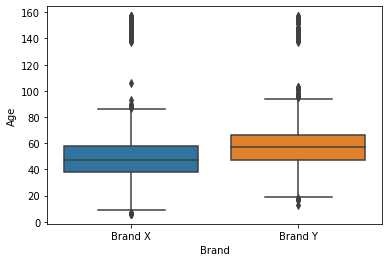

In [130]:
# plotting
sns.boxplot(x='Brand', y='Age', data=q1b)

<AxesSubplot:xlabel='Brand', ylabel='Age'>

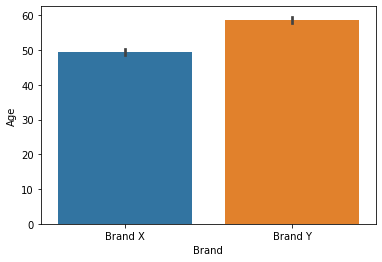

In [131]:
# another plot
sns.barplot(x='Brand', y='Age', data=q1b, ci=95)

In [132]:
# finding means of age based on brand
print('Mean age of patients receiving Brand X vaccine: ', q1b['Age'].loc[q1b['Brand']=='Brand X'].mean())
print('Mean age of people receiving Brad Y vaccine: ', q1b['Age'].loc[q1b['Brand']=='Brand Y'].mean())

Mean age of patients receiving Brand X vaccine:  49.364177737059094
Mean age of people receiving Brad Y vaccine:  58.59139784946237


In [133]:
# ttest - 2 tailed, 2 independent samples with equal variances assumed (Default ttest)
stats.ttest_ind(q1b['Age'].loc[q1b['Brand']=='Brand X'], 
                q1b['Age'].loc[q1b['Brand']=='Brand Y'], 
                equal_var=True)

Ttest_indResult(statistic=-14.019328349884601, pvalue=1.2984512688681624e-43)

In [134]:
# ttest - 2 tailed, 2 independent samples with unequal variances assumed (Welch's ttest)
stats.ttest_ind(q1b['Age'].loc[q1b['Brand']=='Brand X'], 
                q1b['Age'].loc[q1b['Brand']=='Brand Y'], 
                equal_var=False)

Ttest_indResult(statistic=-14.083786462646527, pvalue=5.833379521333903e-44)

#### Question 1 c - What is the average length of time between first and second doses? What is the average length of time between second and third doses?

In [137]:
# average length between 1st and 2nd dose
print('average length between 1st and 2nd dose: ', merged['days bw 1st and 2nd'].mean())
print('average length between 2nd and 3rd dose: ', merged['days bw 2nd and 3rd'].mean())

average length between 1st and 2nd dose:  112.50475841874085
average length between 2nd and 3rd dose:  71.05654761904762


#### Question 1 c - In one or two sentences, describe any trends that you observe.

Overall, compared to the time between the first and second doses, patients who had three vaccines received their third dose relatively quickly after receiving their second. Patients who received the "Brand Y" vaccination on average were 58.6 years old, which was significantly older than patients who received the "Brand X" vaccine (49.4 years). Most of the eligible Manitobans (41.2%) received two doses of the vaccine, compared to 21% who had no immunisation at all.


#### Question 2 a - The client department wants to understand where eligible Manitobans are getting vaccinated. Create a table or visualization that illustrates this.

In [143]:
q2a = merged[['doses', 'vacc1_loc', 'vacc2_loc', 'vacc3_loc']]

In [144]:
# renaming the column
q2a.rename(columns= {'vacc1_loc':'location for 1st vaccination',
                    'vacc2_loc':'location for 2nd vaccination',
                    'vacc3_loc':'location for 3rd vaccination'}, inplace=True)

C:\Users\jaska\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [149]:
# creating longform dataframe from the given variables
test = q2a.melt(id_vars='doses', var_name='vaccination', value_name='Location')

<AxesSubplot:title={'center':"Manitobans' preferred choice of location to get vaccinated"}, xlabel='Location', ylabel='count'>

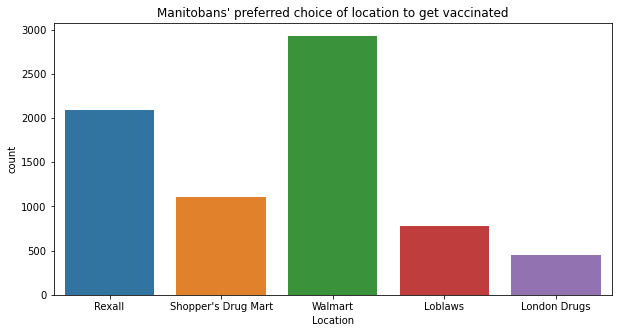

In [161]:
# creating figure
plt.figure(figsize=(10,5))
plt.title("Manitobans' preferred choice of location to get vaccinated")
sns.countplot(x='Location', data=test)

#### Question 2 b - Describe any trends that you observe in how Manitobans are using various locations in the province to receive their first, second, and third doses.

<AxesSubplot:xlabel='Location', ylabel='count'>

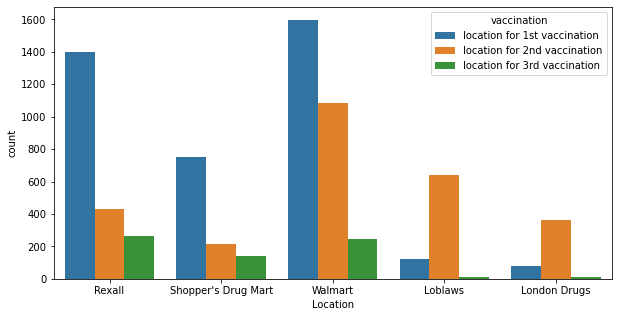

In [155]:
# countplot 1
plt.figure(figsize=(10,5))
sns.countplot(x='Location', hue='vaccination', data=test)

<AxesSubplot:title={'center':"Manitobans' preferred choice of location to get vaccinated"}, xlabel='vaccination', ylabel='count'>

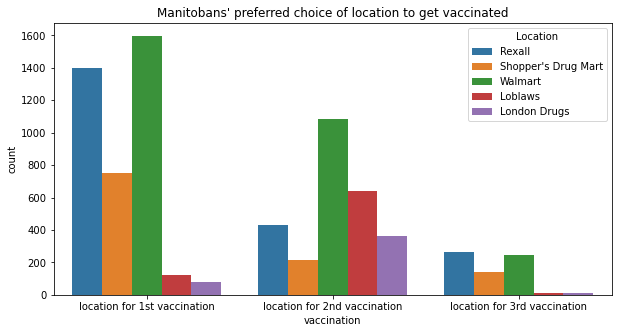

In [158]:
# countplot 2 - seems more probable
plt.figure(figsize=(10,5))
plt.title("Manitobans' preferred choice of location to get vaccinated")
sns.countplot(hue='Location', x='vaccination', data=test)

The following is the ranking of Manitobans' overall preferred locations to get vaccinated:
Walmart > Rexall > Shopper's Drug Mart > Loblaws > London Drugs. However, this may also reflect the number of accessible locations of these stores for people receiving vaccines; for example, Walmart may have a greater number of accessible locations than London Drugs.

For the first and second immunisation doses, Manitobans chose Walmart, whereas for the third dosage, Rexall appears to be the top option, closely followed by Walmart. The least preferred locations for Manitobans to receive vaccinations appear to be Loblaws and London Drugs. However, Manitobans' second-best option for where to receive their second dose of immunisation was Loblaws.

#### Question 3 - At the end of each vaccine appointment, patients are required to fill out a satisfaction survey rating their level of satisfaction with their appointment on a scale from 1-100 (100 being the highest level of satisfaction). Recent media reports have highlighted stories of dissatisfaction in the vaccine process, especially as it relates to the brand of the vaccine.

#### Part A: Your Director is convinced that vaccine brand is driving satisfaction scores and is planning to propose a costly advertising campaign to address hesitancy associated with one of the vaccine brands.

#### Complete an analysis of the association between vaccine brand and level of satisfaction using each patient’s most recent vaccine appointment record only. Provide the output of your test.

#### Explain what these results mean and whether or not they confirm your Director's hypothesis.

In [165]:
# first we need to extract the patients' most recent record
# getting record of people who were vaccinated
vaccinated = merged[merged['doses'].notnull()]
vaccinated.head()

,ID,sex,city_of_residence,profession,dob,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,...,Location_new3,vacc1_date,vacc1_loc,vacc3_date,vacc3_loc,vacc2_date,vacc2_loc,days bw 1st and 2nd,days bw 2nd and 3rd,doses
0,84f316l,Female,winnipeg,Electrician,10-12-1974,Brand X,Brand X,Brand X,59.82,43.50,...,Loblaws,2021-02-27,Rexall,2021-12-23,Walmart,2021-11-22,Loblaws,268.0,31.0,3.0
1,p5edjwt,Female,WINNIPEG,Doctor,08-11-1970,Brand Y,Brand Y,Brand Y,49.95,25.71,...,Walmart,2021-08-06,Shopper's Drug Mart,2021-12-05,Walmart,2021-10-15,Walmart,70.0,51.0,3.0
3,us41te7,Male,Winnipeg,Doctor,19-10-1977,Brand X,Brand X,NaN,44.27,41.14,...,NaN,2021-01-09,Rexall,NaT,NaN,2021-06-19,Loblaws,161.0,NaN,2.0
4,j2m7v9a,Female,Portage La Prairie,Data Scientist,02-02-1980,Brand Y,NaN,NaN,34.66,NaN,...,NaN,2021-12-17,Rexall,NaT,NaN,NaT,None,NaN,NaN,1.0
6,7pgz9el,Male,winnipeg,Electrician,09-04-1964,Brand X,Brand X,Brand X,55.89,41.00,...,Walmart,2021-02-12,Walmart,2021-10-23,Walmart,2021-04-18,London Drugs,65.0,188.0,3.0


In [166]:
# getting their satisfaction score for each vaccination - vacc1
vaccinated['vacc1_score'] = np.where(vaccinated['vacc1_date']==vaccinated['new_date1'], vaccinated['Satisfaction1'],
                          np.where(vaccinated['vacc1_date']==vaccinated['new_date2'], vaccinated['Satisfaction2'],
                                  np.where(vaccinated['vacc1_date']==vaccinated['new_date3'], vaccinated['Satisfaction3'], None)))

<ipython-input-166-89e892ec1f31>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinated['vacc1_score'] = np.where(vaccinated['vacc1_date']==vaccinated['new_date1'], vaccinated['Satisfaction1'],


In [168]:
# getting their satisfaction score for each vaccination - vacc2
vaccinated['vacc2_score'] = np.where(vaccinated['vacc2_date']==vaccinated['new_date1'], vaccinated['Satisfaction1'],
                          np.where(vaccinated['vacc2_date']==vaccinated['new_date2'], vaccinated['Satisfaction2'],
                                  np.where(vaccinated['vacc2_date']==vaccinated['new_date3'], vaccinated['Satisfaction3'], None)))

<ipython-input-168-a2ecf815b6cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinated['vacc2_score'] = np.where(vaccinated['vacc2_date']==vaccinated['new_date1'], vaccinated['Satisfaction1'],


In [170]:
# getting their satisfaction score for each vaccination - vacc3
vaccinated['vacc3_score'] = np.where(vaccinated['vacc3_date']==vaccinated['new_date1'], vaccinated['Satisfaction1'],
                          np.where(vaccinated['vacc3_date']==vaccinated['new_date2'], vaccinated['Satisfaction2'],
                                  np.where(vaccinated['vacc3_date']==vaccinated['new_date3'], vaccinated['Satisfaction3'], None)))

<ipython-input-170-fe98692fb48e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinated['vacc3_score'] = np.where(vaccinated['vacc3_date']==vaccinated['new_date1'], vaccinated['Satisfaction1'],


In [172]:
# checking
vaccinated.head()

,ID,sex,city_of_residence,profession,dob,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,...,vacc3_date,vacc3_loc,vacc2_date,vacc2_loc,days bw 1st and 2nd,days bw 2nd and 3rd,doses,vacc1_score,vacc2_score,vacc3_score
0,84f316l,Female,winnipeg,Electrician,10-12-1974,Brand X,Brand X,Brand X,59.82,43.50,...,2021-12-23,Walmart,2021-11-22,Loblaws,268.0,31.0,3.0,43.5,23.87,59.82
1,p5edjwt,Female,WINNIPEG,Doctor,08-11-1970,Brand Y,Brand Y,Brand Y,49.95,25.71,...,2021-12-05,Walmart,2021-10-15,Walmart,70.0,51.0,3.0,49.95,44.13,25.71
3,us41te7,Male,Winnipeg,Doctor,19-10-1977,Brand X,Brand X,NaN,44.27,41.14,...,NaT,NaN,2021-06-19,Loblaws,161.0,NaN,2.0,44.27,41.14,None
4,j2m7v9a,Female,Portage La Prairie,Data Scientist,02-02-1980,Brand Y,NaN,NaN,34.66,NaN,...,NaT,NaN,NaT,None,NaN,NaN,1.0,34.66,None,None
6,7pgz9el,Male,winnipeg,Electrician,09-04-1964,Brand X,Brand X,Brand X,55.89,41.00,...,2021-10-23,Walmart,2021-04-18,London Drugs,65.0,188.0,3.0,41,55.89,44.88


In [174]:
# getting satisfaction score for most recent value
vaccinated['recent_score'] = np.where(vaccinated['doses']==3, vaccinated['vacc3_score'], 
                           np.where(vaccinated['doses']==2, vaccinated['vacc2_score'], 
                                    vaccinated['vacc1_score']))

<ipython-input-174-8ff30d168f9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinated['recent_score'] = np.where(vaccinated['doses']==3, vaccinated['vacc3_score'],


In [176]:
# checking
vaccinated.tail(10)

,ID,sex,city_of_residence,profession,dob,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,...,vacc3_loc,vacc2_date,vacc2_loc,days bw 1st and 2nd,days bw 2nd and 3rd,doses,vacc1_score,vacc2_score,vacc3_score,recent_score
4989,t2inevm,Female,Steinbach,Data Scientist,13-02-1970,Brand Y,NaN,NaN,44.88,NaN,...,NaN,NaT,None,NaN,NaN,1.0,44.88,None,None,44.88
4990,c7u9rjb,Female,winnipeg,Computer Scientist,08-02-1958,Brand X,NaN,NaN,53.06,NaN,...,NaN,NaT,None,NaN,NaN,1.0,53.06,None,None,53.06
4991,dowsxzq,Male,winnipeg,Data Scientist,18-12-1948,Brand X,Brand X,NaN,66.26,80.59,...,NaN,2021-11-05,Walmart,262.0,NaN,2.0,66.26,80.59,None,80.59
4992,t98x5zi,Female,Winkler,Nurse,21-05-1989,Brand X,Brand X,NaN,51.63,55.09,...,NaN,2021-09-01,Loblaws,175.0,NaN,2.0,51.63,55.09,None,55.09
4993,nedu4ck,Male,Winkler,Nurse,26-03-1980,Brand X,NaN,NaN,29.97,NaN,...,NaN,NaT,None,NaN,NaN,1.0,29.97,None,None,29.97
4994,jic6dhm,Female,brandon,Nurse,06-04-1869,Brand X,Brand X,NaN,44.34,52.97,...,NaN,2021-09-02,Walmart,149.0,NaN,2.0,44.34,52.97,None,52.97
4995,76wlqyz,Male,Steinbach,Nurse,08-12-1972,Brand Y,Brand Y,Brand Y,40.88,38.12,...,Shopper's Drug Mart,2021-04-25,Loblaws,68.0,161.0,3.0,38.12,40.88,46.31,46.31
4996,450joik,Male,winnipeg,Doctor,25-06-2010,Brand X,NaN,NaN,31.19,NaN,...,NaN,NaT,None,NaN,NaN,1.0,31.19,None,None,31.19
4997,kpxflo1,Female,Winkler,Doctor,06-02-1968,Brand X,NaN,NaN,69.23,NaN,...,NaN,NaT,None,NaN,NaN,1.0,69.23,None,None,69.23
4999,ityl1qe,Male,Winnipeg,Computer Scientist,24-10-1957,Brand Y,NaN,NaN,73.14,NaN,...,NaN,NaT,None,NaN,NaN,1.0,73.14,None,None,73.14


In [177]:
# extracting desired dataframe
q3a = vaccinated[['Brand1', 'recent_score']]
q3a.head()

,Brand1,recent_score
0,Brand X,59.82
1,Brand Y,25.71
3,Brand X,41.14
4,Brand Y,34.66
6,Brand X,44.88


In [178]:
# renaming column titles
q3a.rename(columns= {'Brand1':'Brand', 'recent_score':'Satisfaction score'}, inplace=True)
q3a.head()

C:\Users\jaska\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Brand,Satisfaction score
0,Brand X,59.82
1,Brand Y,25.71
3,Brand X,41.14
4,Brand Y,34.66
6,Brand X,44.88


<AxesSubplot:xlabel='Brand', ylabel='Satisfaction score'>

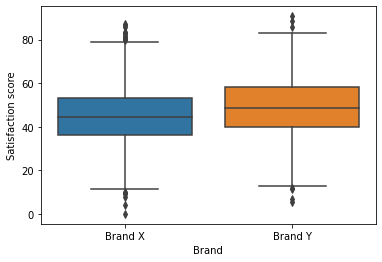

In [179]:
# plotting
sns.boxplot(x='Brand', y='Satisfaction score', data=q3a)

<AxesSubplot:xlabel='Brand', ylabel='Satisfaction score'>

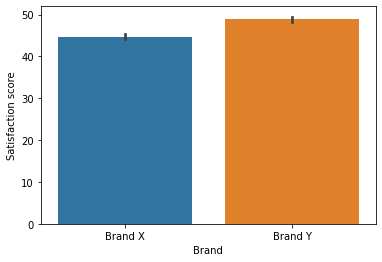

In [180]:
# another plot
sns.barplot(x='Brand', y='Satisfaction score', data=q3a, ci=95)

In [181]:
# finding means of score based on brand
print('Mean score of patients receiving Brand X vaccine: ', q3a['Satisfaction score'].loc[q3a['Brand']=='Brand X'].mean())
print('Mean score of people receiving Brad Y vaccine: ', q3a['Satisfaction score'].loc[q3a['Brand']=='Brand Y'].mean())

Mean score of patients receiving Brand X vaccine:  44.66672469079252
Mean score of people receiving Brad Y vaccine:  48.86473118279564


In [185]:
abs(q3a['Satisfaction score'].loc[q3a['Brand']=='Brand X'].mean() - 
    q3a['Satisfaction score'].loc[q3a['Brand']=='Brand Y'].mean())

4.198006492003117

In [182]:
# ttest - 2 tailed, 2 independent samples with equal variances assumed (Default ttest)
stats.ttest_ind(q3a['Satisfaction score'].loc[q3a['Brand']=='Brand X'], 
                q3a['Satisfaction score'].loc[q3a['Brand']=='Brand Y'], 
                equal_var=True)

Ttest_indResult(statistic=-10.031977202201029, pvalue=2.0982557498959707e-23)

In [183]:
# ttest - 2 tailed, 2 independent samples with unequal variances assumed (Welch's ttest)
stats.ttest_ind(q3a['Satisfaction score'].loc[q3a['Brand']=='Brand X'], 
                q3a['Satisfaction score'].loc[q3a['Brand']=='Brand Y'], 
                equal_var=False)

Ttest_indResult(statistic=-10.026114449433678, pvalue=2.2905730526890435e-23)

<AxesSubplot:xlabel='Brand', ylabel='count'>

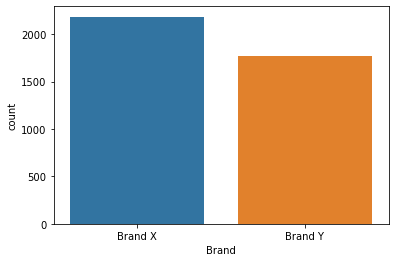

In [184]:
sns.countplot(x='Brand', data=q3a)

Looking at the graph, it does seem like the vaccine brand is driving satisfaction scores. Overall, Brand X vaccine garnered a lower satisfaction score as compared to Brand Y vaccine. Statistically, the satisfaction scores associated with the Brand X vaccine were significantly lower than those of the Brand Y vaccine. However, it should be noted that the difference between the average satisfaction scores associated with both the brands of vaccine is only 4.2 points. Before investing heavily in any advertising campaign, this aspect needs to be explored thoroughly, and it needs to be determined whether the difference of 4.2 points is realistically important or not. Moreover, there may be other factors driving the satisfaction scores as well, such as the location where the dose was administered, sex of the patient, the patient's city of residence, profession of the patient, and the patient's age. 

Therefore, statistically, the Director's hypothesis is correct, but it's important to consider the realistic significance of the difference in scores between the two vaccination brands before making a substantial investment in an advertising campaign.

#### Question 3 Part B: Looking at the descriptive output you have produced earlier in your analysis, you suspect that there might be something else driving the relationship between vaccine brand and satisfaction.

#### Using only patients’ most recent vaccine appointment records, run a statistical model to comment on the effect of vaccine brand when taking into account other explanatory variables available in the data.

#### Explain your modeling approach and why you included the variables you did in the model. Write up a short summary of your results with a focus on how they relate to your Director’s original hypothesis. Be sure to clearly interpret coefficients and any other relevant aspects of the model output. Explain your results in clear, non-technical language.

In [196]:
# cleaning the city column in dataframe
# mainly there are 5 cities in the given dataset
# let us specify city names in a cleaner/standardised way
vaccinated.loc[vaccinated['city_of_residence'].str.contains("winnipeg", case=False), 'City'] = "Winnipeg"
vaccinated.loc[vaccinated['city_of_residence'].str.contains("portage", case=False), 'City'] = "Portage La Prairie"
vaccinated.loc[vaccinated['city_of_residence'].str.contains("brandon", case=False), 'City'] = "Brandon"
vaccinated.loc[vaccinated['city_of_residence'].str.contains("winkler", case=False), 'City'] = "Winkler"
vaccinated.loc[vaccinated['city_of_residence'].str.contains("steinbach", case=False), 'City'] = "Steinbach"

C:\Users\jaska\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\jaska\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [199]:
# formatting dob
vaccinated['clean_dob'] = pd.to_datetime(vaccinated['dob'], dayfirst=True)

<ipython-input-199-816416bb89d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinated['clean_dob'] = pd.to_datetime(vaccinated['dob'], dayfirst=True)


In [201]:
# applying the previously defined function to calculate age
vaccinated['Age'] = vaccinated['clean_dob'].apply(calc_age)

<ipython-input-201-5972ac3a39b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinated['Age'] = vaccinated['clean_dob'].apply(calc_age)


In [205]:
# getting most recent location
vaccinated['recent_location'] = np.where(vaccinated['doses']==3, vaccinated['vacc3_loc'], 
                           np.where(vaccinated['doses']==2, vaccinated['vacc2_loc'], 
                                    vaccinated['vacc1_loc']))

<ipython-input-205-584cf291809c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccinated['recent_location'] = np.where(vaccinated['doses']==3, vaccinated['vacc3_loc'],


In [208]:
# checking
vaccinated.head()

,ID,sex,city_of_residence,profession,dob,Brand1,Brand2,Brand3,Satisfaction1,Satisfaction2,...,days bw 2nd and 3rd,doses,vacc1_score,vacc2_score,vacc3_score,recent_score,City,clean_dob,Age,recent_location
0,84f316l,Female,winnipeg,Electrician,10-12-1974,Brand X,Brand X,Brand X,59.82,43.50,...,31.0,3.0,43.5,23.87,59.82,59.82,Winnipeg,1974-12-10,47,Walmart
1,p5edjwt,Female,WINNIPEG,Doctor,08-11-1970,Brand Y,Brand Y,Brand Y,49.95,25.71,...,51.0,3.0,49.95,44.13,25.71,25.71,Winnipeg,1970-11-08,51,Walmart
3,us41te7,Male,Winnipeg,Doctor,19-10-1977,Brand X,Brand X,NaN,44.27,41.14,...,NaN,2.0,44.27,41.14,None,41.14,Winnipeg,1977-10-19,44,Loblaws
4,j2m7v9a,Female,Portage La Prairie,Data Scientist,02-02-1980,Brand Y,NaN,NaN,34.66,NaN,...,NaN,1.0,34.66,None,None,34.66,Portage La Prairie,1980-02-02,42,Rexall
6,7pgz9el,Male,winnipeg,Electrician,09-04-1964,Brand X,Brand X,Brand X,55.89,41.00,...,188.0,3.0,41,55.89,44.88,44.88,Winnipeg,1964-04-09,58,Walmart


In [209]:
# extracting data for further analysis
data = vaccinated[['sex', 'City', 'profession', 'Age', 'Brand1', 'doses', 'recent_location', 'recent_score']]

In [211]:
# renaming the column
data.rename(columns= {'sex':'Sex', 'profession':'Profession', 'Brand1':'Brand', 
                      'doses':'N_dose', 'recent_location':'Location', 'recent_score':'Score'}, 
            inplace=True)

C:\Users\jaska\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [212]:
# checking
data.head()

,Sex,City,Profession,Age,Brand,N_dose,Location,Score
0,Female,Winnipeg,Electrician,47,Brand X,3.0,Walmart,59.82
1,Female,Winnipeg,Doctor,51,Brand Y,3.0,Walmart,25.71
3,Male,Winnipeg,Doctor,44,Brand X,2.0,Loblaws,41.14
4,Female,Portage La Prairie,Data Scientist,42,Brand Y,1.0,Rexall,34.66
6,Male,Winnipeg,Electrician,58,Brand X,3.0,Walmart,44.88


In [213]:
# exporting to excel
data.to_excel(r'C:/Users/jaska/Desktop/data/data.xlsx', index = False)